In [2]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import data
df = (
    pd.read_excel('data.xlsx',0,header=[0,1]).iloc[:,1:]
    .join(pd.read_excel('data.xlsx',1,header=[0,1]).iloc[:,1:])
)

# Clean column names
clean_names = {'NWP (£m) ': 'NWP',
               'SCR (£m)': 'SCR',
               'EoF for SCR (£m)': 'EoF_SCR',
               'SCR coverage ratio': 'SCRR',
               'GWP (£m)': 'GWP',
               'Total assets (£m)': 'Assets',
               'Total liabilities (£m)': 'Liabilities',
               'Excess of assets over liabilities (£m) [= equity]': 'Equity',
               'Gross BEL (inc. TPs as whole, pre-TMTP) (£m)': 'GBEL', # best estimate liability
               'Net BEL (inc. TPs as a whole, pre-TMTP) (£m)': 'NBEL',
               'Gross claims incurred (£m)': 'GCI',
               'Gross combined ratio': 'GCR',
               'Gross expense ratio': 'GER',
               'Net combined ratio': 'NCR',
               'Net expense ratio': 'NER',
               'Pure gross claims ratio': 'PGCR',
               'Pure net claims ratio':'PNCR'}

df.columns = pd.MultiIndex.from_tuples([(clean_names[col[0]], int(col[1][:4])) for col in df.columns])

# Add Firm column
df = df.reset_index(names='Firm')
df['Firm'] += 1

# Remove rows with 0 throughout (excl. Firm column) and reset index
df = df.loc[(df[df.columns[1:]]!=0).any(axis=1)].reset_index(drop=True)

# Replace 0 with NaN
df = df.replace(0,np.nan)

years = df.columns.levels[1][:-1]
df

Firm           NWP                                             
                  2016          2017          2018          2019   
0      1 -13779.815629           NaN           NaN           NaN  \
1      2     28.178059     26.865049     25.064438     23.226445   
2      3           NaN     75.609681     70.578732     78.432782   
3      4  22344.199923  23963.910709  25760.390158  25512.748836   
4      5     68.200993     51.663132     44.010833     42.008556   
..   ...           ...           ...           ...           ...   
318  321           NaN           NaN     -1.011367     -6.599067   
319  322   2092.156137   2084.124818   2022.212247   2103.048716   
320  323           NaN           NaN           NaN           NaN   
321  324     23.415380     22.650321     24.268465     25.811984   
322  325    240.999886    252.698937    332.521848    294.886332   

                            SCR                                             
             2020          2016          2017          2018          2019   
0             NaN   1085.360139  9.635840e-09           NaN           NaN  \
1       21.718558     10.190314  1.011357e+01      9.495235      8.146471   
2       85.735830    322.955115  3.637823e+02    362.290859    394.295982   
3    24996.021042  16573.644800  1.633275e+04  17103.616000  17219.246080   
4       81.273653     52.824396  3.805377e+01     34.696815     57.231788   
..            ...           ...           ...           ...           ...   
318     24.632234           NaN  2.586211e-01     62.227588     51.830942   
319   2029.697013   1711.220667  1.641309e+03   1329.471064   1399.098954   
320           NaN     30.438558  1.523262e+01      5.332069      1.551370   
321     26.546638     32.096633  3.020595e+01     29.517977     29.954935   
322           NaN    209.181524  2.238009e+02    256.862723    240.295897   

     ...       GER                                                GCR   
     ...      2016       2017      2018      2019      2020      2016   
0    ...       NaN  56.813725       NaN       NaN       NaN       NaN  \
1    ...  0.743265   0.963451  0.814588       NaN       NaN  0.945394   
2    ...       NaN        NaN       NaN       NaN       NaN       NaN   
3    ...  0.143930   0.147519  0.092971  0.054781 -0.546237  0.848032   
4    ...  0.177212   0.134310  0.109074  0.121044  0.109187  0.508711   
..   ...       ...        ...       ...       ...       ...       ...   
318  ...  0.211938   0.256118  0.245704  0.236224  0.278674  0.978004   
319  ...  0.364543   0.372169  0.398770  0.420327  0.373813  0.885956   
320  ...       NaN        NaN       NaN       NaN       NaN       NaN   
321  ...  0.427635   0.371681  0.357627  0.330893  0.302577  1.063136   
322  ...  0.044248   0.040154  0.037627  0.043566  0.045283  0.164648   

                                               
          2017      2018      2019       2020  
0    68.215239       NaN       NaN        NaN  
1     1.126744  0.939197       NaN        NaN  
2          NaN       NaN       NaN        NaN  
3     1.474778  1.727968  1.208823 -10.736084  
4     1.259454  1.304168  0.983277   0.997184  
..         ...       ...       ...        ...  
318   1.002691  0.972540  0.958443   0.816870  
319   0.960993  0.913687  0.943246   0.995833  
320        NaN       NaN       NaN        NaN  
321   1.006945  0.982816  0.994712   0.780065  
322   0.183376  0.427933  0.274733   0.180449  

[323 rows x 86 columns]

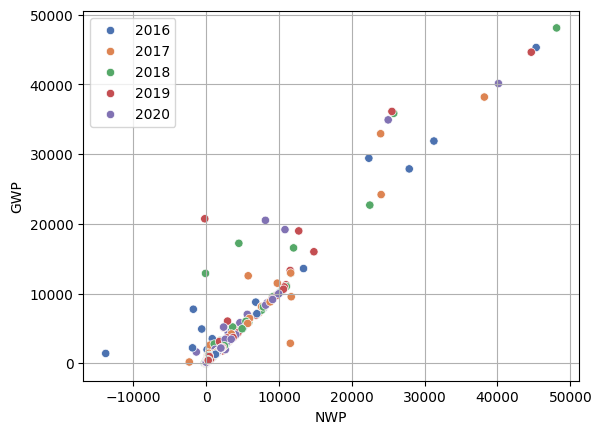

In [3]:
# Plot NWP/GWP for each year
from sklearn.linear_model import LinearRegression, QuantileRegressor

# Starting data
plotdata = df.loc[:,['NWP','GWP']].stack().dropna()
for i, _ in plotdata.index:
    plotdata.loc[i,'Firm'] = df.iloc[i,0]

# Plot
fig, ax = plt.subplots()
sns.scatterplot(data=plotdata, x='NWP', y='GWP', hue=plotdata.index.droplevel(0), palette='deep')#.join(df['Firm'])
ax.grid(True)
plt.legend()
plt.savefig('gwp_v_nwp.png',dpi=200,bbox_inches='tight')
plt.show()

C:\Users\jeanm\AppData\Local\Temp\ipykernel_7472\698252670.py:25: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=plotdata, x='NWP', y='GWP', palette='deep')


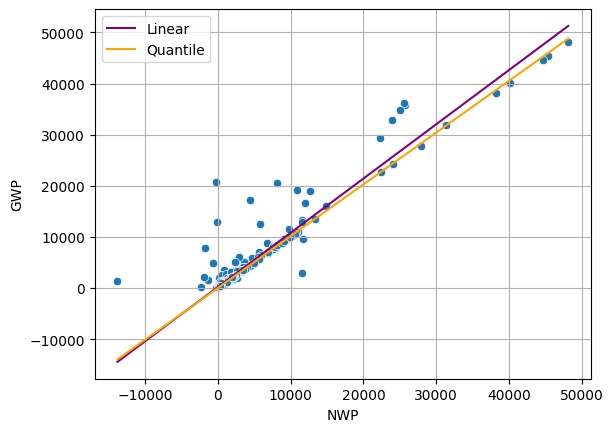

In [558]:
# Combine all four into here later!
# Plot NWP/GWP for each year
from sklearn.linear_model import LinearRegression, QuantileRegressor

# Starting data
plotdata = df.loc[:,['NWP','GWP']].stack().dropna()
for i, _ in plotdata.index:
    plotdata.loc[i,'Firm'] = df.iloc[i,0]

# Plot
fig, ax = plt.subplots()
sns.scatterplot(data=plotdata, x='NWP', y='GWP', palette='deep')

# Linear Regression
lin_reg = LinearRegression().fit(np.array(plotdata['NWP']).reshape(-1,1),plotdata['GWP'])
plotdata['Pred'] = lin_reg.predict(np.array(plotdata['NWP']).reshape(-1,1))
sns.lineplot(data=plotdata, x='NWP', y='Pred', label='Linear', c='purple')

# Quantile Regression
#q_reg = QuantileRegressor().fit(np.array(plotdata['NWP']).reshape(-1,1),plotdata['GWP'])
plotdata['Pred'] = q_reg.predict(np.array(plotdata['NWP']).reshape(-1,1))
sns.lineplot(data=plotdata, x='NWP', y='Pred', label='Quantile', c='orange')

ax.grid(True)
plt.legend()
plt.savefig('lin_v_q.png',dpi=200,bbox_inches='tight')
plt.show()

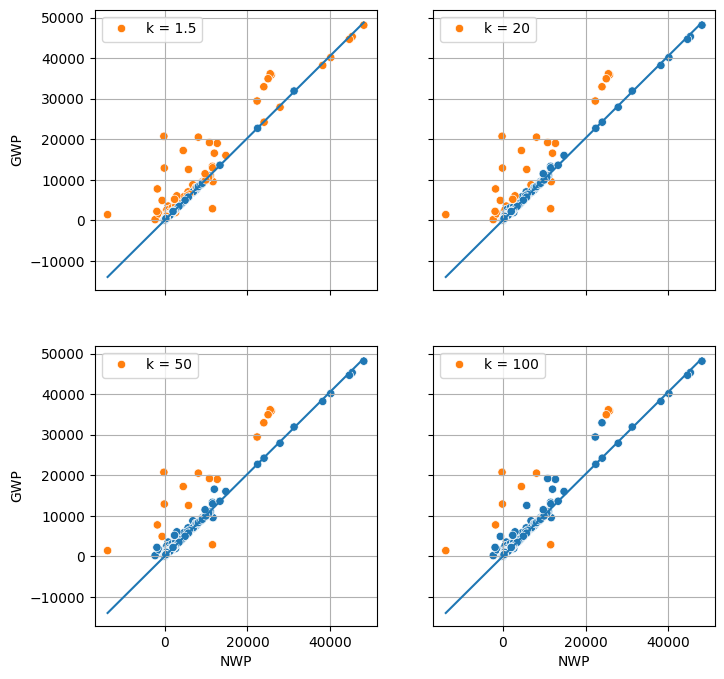

In [528]:
# Combine all four into here later!
# Plot NWP/GWP for each year
from sklearn.linear_model import LinearRegression, QuantileRegressor

# Return upper and lower bounds of a series using the (1.5) IQR rule
def IQR(ser,k=1.5):
    q1 = ser.quantile(.25)
    q3 = ser.quantile(.75)
    iqr = q3 - q1
    upper = q3 + k * iqr
    lower = q1 - k * iqr
    return upper, lower

# Starting data
plotdata = df.loc[:,['NWP','GWP']].stack().dropna()
for i, _ in plotdata.index:
    plotdata.loc[i,'Firm'] = df.iloc[i,0]

# Linear Regression
lin_reg = LinearRegression().fit(np.array(plotdata['NWP']).reshape(-1,1),plotdata['GWP'])
plotdata['Pred'] = lin_reg.predict(np.array(plotdata['NWP']).reshape(-1,1))

# Quantile Regression (will take a minute to run)
# q_reg = QuantileRegressor().fit(np.array(plotdata['NWP']).reshape(-1,1),plotdata['GWP'])
# plotdata['Pred'] = q_reg.predict(np.array(plotdata['NWP']).reshape(-1,1))

plotdata['Diff'] = plotdata['Pred'] - plotdata['GWP']

# Plots
fig, axs = plt.subplots(2,2,figsize=(8,8),sharex=True,sharey=True)
params = {
    'data': plotdata,
    'x':'NWP',
    'y':'GWP',
    'hue':'Status'
    }
kmap = {
    (0,0): 1.5,
    (0,1): 20,
    (1,0): 50,
    (1,1): 100,
}


for i in [0,1]:
    for j in [0,1]:

        sns.lineplot(ax=axs[i,j], data=plotdata, x='NWP', y='Pred')

        plotdata['Status'] = 0
        k = kmap[(i,j)]        
        upper, lower = IQR(plotdata['Diff'],k)
        plotdata.loc[(plotdata['Diff'] > upper) | (plotdata['Diff'] < lower),'Status'] = 1
        sns.scatterplot(ax=axs[i,j], **params)

        axs[i,j].set_ylabel('GWP')
        axs[i,j].grid()
        h, l = axs[i,j].get_legend_handles_labels()
        axs[i,j].legend(h[1:], ['k = ' + str(kmap[(i,j)])])

#plt.savefig('quad_outliers.png',dpi=200,bbox_inches='tight')
plt.show()

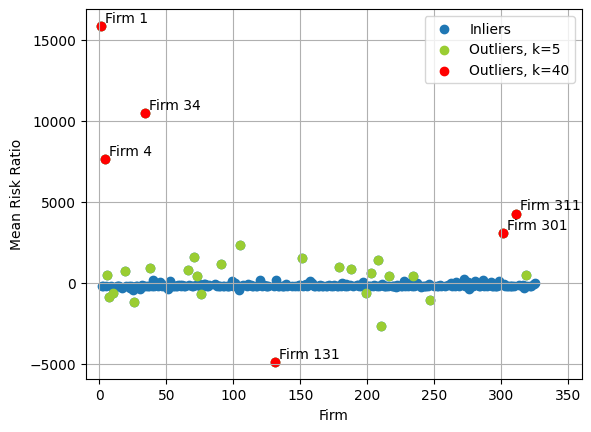

In [548]:
grouped = pd.DataFrame({'Firm': plotdata['Firm'], 'Pred': plotdata['GWP']-y_pred})
grouped = grouped.groupby('Firm',as_index=False).mean()
grouped['Firm'] = grouped['Firm'].astype('int')

fig, ax = plt.subplots()
plt.scatter(grouped['Firm'],grouped['Pred'],label='Inliers')

q1 = grouped['Pred'].quantile(.25)
q3 = grouped['Pred'].quantile(.75)
iqr = q3 - q1
upper = q3 + 40 * iqr
lower = q1 - 40 * iqr

subgroup = grouped.loc[(grouped['Pred'] > q3 + 5 * iqr) | (grouped['Pred'] < q1 - 5 * iqr),:]
plt.scatter(subgroup['Firm'],subgroup['Pred'],color='yellowgreen',label='Outliers, k=5')

subgroup = grouped.loc[(grouped['Pred'] > q3 + 40 * iqr) | (grouped['Pred'] < q1 - 40 * iqr),:]
plt.scatter(subgroup['Firm'],subgroup['Pred'],color='r',label='Outliers, k=40')

for i in grouped.loc[(grouped['Pred'] > q3 + 40 * iqr) | (grouped['Pred'] < q1 - 40 * iqr),:].index:
    ax.annotate('Firm ' + str(grouped.loc[i,'Firm']), (grouped.iloc[i]), xytext=(3,3), textcoords='offset points')

ax.set_xlabel('Firm')
ax.set_ylabel('Mean Risk Ratio')
ax.set_xlim(-10,360)
ax.grid()

plt.legend()
plt.savefig('rr_outliers.png',dpi=200,bbox_inches='tight')
plt.show()

In [7]:
import pandas as pd
from sklearn.datasets import load_breast_cancer

X_train, y_train = load_breast_cancer(as_frame=True, return_X_y=True)
y_train

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32